In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [15]:


import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


data = pd.read_csv(url, names=column_names)


print("DataFrame original: \n", data)


DataFrame original: 
       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  target 

In [10]:
print(data.head())
print(data.info())
print(data.describe())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-n

In [16]:
import warnings

warnings.filterwarnings('ignore')

from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score,LeaveOneOut,ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

array = data.values

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Remplacement des valeurs manquantes
data = data.replace('?', np.nan)
data = data.dropna()

# Conversion des colonnes en types appropriés
data = data.astype(float)

# Convertir le DataFrame en tableau NumPy
array = data.values

X = array[:, :-1]  
y = array[:, -1]   

# Convertir y en une variable binaire
y = np.where(y > 0, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


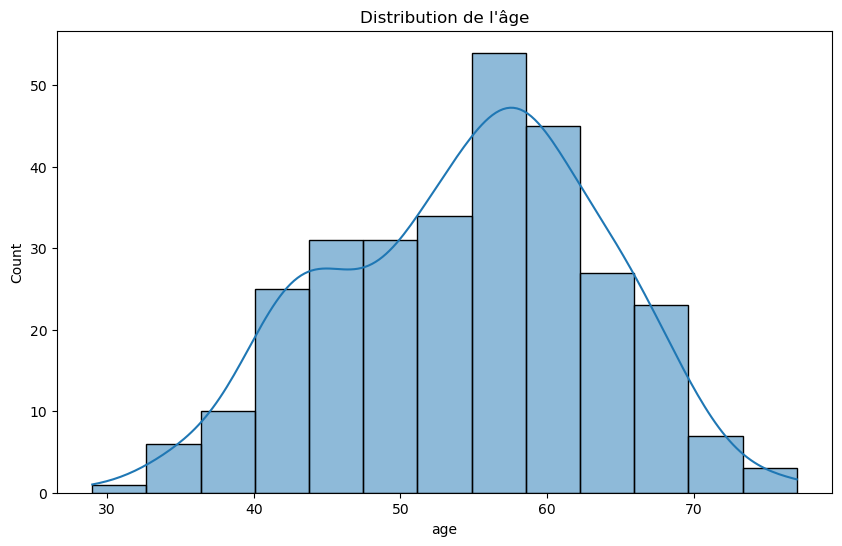

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Distribution de l\'âge')
plt.show()




AttributeError: 'numpy.float64' object has no attribute 'startswith'

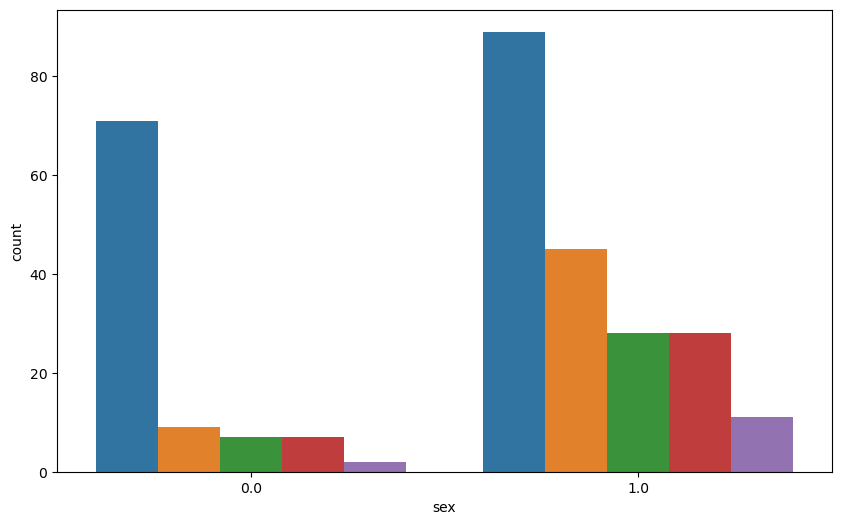

In [30]:
# Présence de maladie cardiaque par sexe
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=data)
plt.title('Présence de maladie cardiaque par sexe')
plt.show()

AttributeError: 'numpy.float64' object has no attribute 'startswith'

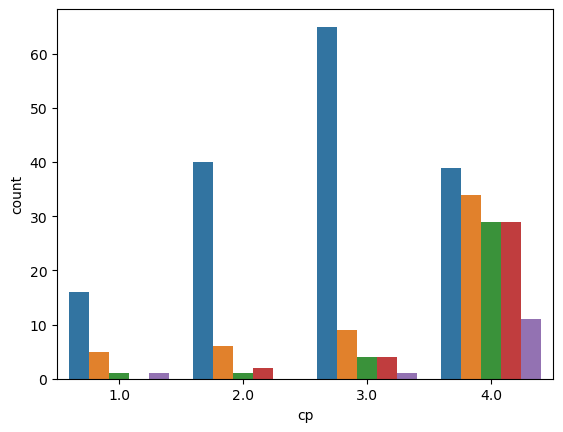

In [41]:
sns.countplot(x='cp', hue='target', data=data)
plt.xlabel('Type de douleur thoracique')
plt.ylabel('Nombre d\'individus')
plt.title('Type de douleur thoracique et présence de maladie cardiaque')
plt.show()

In [42]:
# d. Valeurs moyennes pour trestbps, chol, et thalach
mean_values = data.groupby('target')[['trestbps', 'chol', 'thalach']].mean()
print("\nValeurs moyennes pour trestbps, chol, et thalach : \n", mean_values)


Valeurs moyennes pour trestbps, chol, et thalach : 
           trestbps        chol     thalach
target                                    
0.0     129.175000  243.493750  158.581250
1.0     133.277778  249.148148  145.981481
2.0     134.371429  260.857143  135.000000
3.0     135.457143  246.457143  132.057143
4.0     138.769231  253.384615  140.615385


AttributeError: 'numpy.float64' object has no attribute 'startswith'

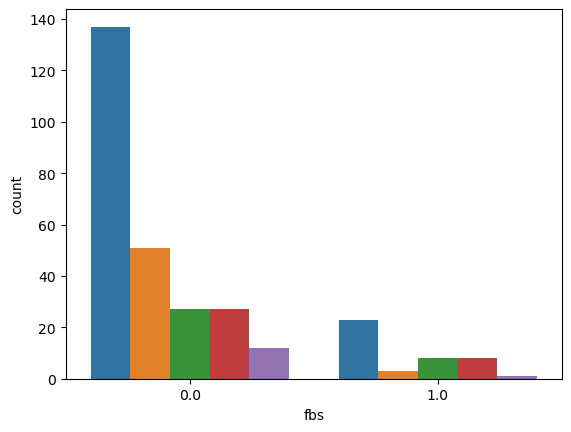

In [43]:
# e. Glycémie à jeun et présence de maladie cardiaque
sns.countplot(x='fbs', hue='target', data=data)
plt.xlabel('Glycémie à jeun > 120 mg/dl')
plt.ylabel('Nombre d\'individus')
plt.title('Glycémie à jeun et présence de maladie cardiaque')
plt.show()

AttributeError: 'numpy.float64' object has no attribute 'startswith'

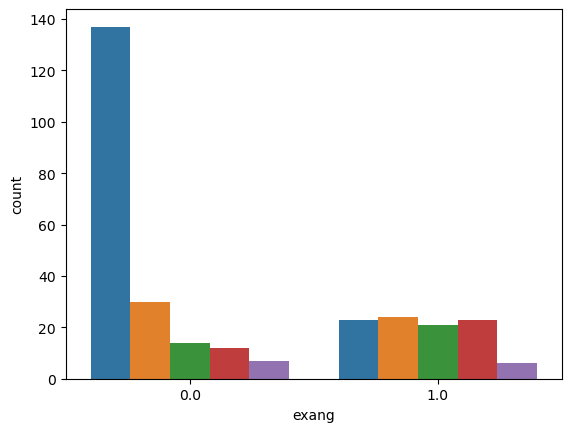

In [19]:
# f. Angine induite par l'exercice et maladie cardiaque
sns.countplot(x='exang', hue='target', data=data,)
plt.xlabel('Angine induite par l\'exercice')
plt.ylabel('Nombre d\'individus')
plt.title('Angine induite par l\'exercice et présence de maladie cardiaque')
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Entraînement du modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred_model = model.predict(X_test)
y_pred_prob_model = model.predict_proba(X_test)[:, 1]

# Évaluation
print("Logistic Regression")
print(classification_report(y_test, y_pred_model))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob_model))


Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

AUC-ROC: 0.9421296296296298


In [24]:
from sklearn.svm import SVC

# Entraînement du modèle
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Prédictions
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

# Évaluation
print("Support Vector Machine")
print(classification_report(y_test, y_pred_svm))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob_svm))


Support Vector Machine
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

AUC-ROC: 0.9537037037037037


In [25]:
from sklearn.tree import DecisionTreeClassifier

# Entraînement du modèle
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Prédictions
y_pred_dt = dt.predict(X_test)
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]

# Évaluation
print("Decision Tree Classifier")
print(classification_report(y_test, y_pred_dt))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob_dt))


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        36
           1       0.67      0.83      0.74        24

    accuracy                           0.77        60
   macro avg       0.77      0.78      0.76        60
weighted avg       0.79      0.77      0.77        60

AUC-ROC: 0.7777777777777779


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement du modèle
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Évaluation
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

AUC-ROC: 0.939236111111111


In [27]:
from sklearn.ensemble import AdaBoostClassifier

# Entraînement du modèle
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

# Prédictions
y_pred_ada = ada.predict(X_test)
y_pred_prob_ada = ada.predict_proba(X_test)[:, 1]

# Évaluation
print("AdaBoost")
print(classification_report(y_test, y_pred_ada))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob_ada))


AdaBoost
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

AUC-ROC: 0.9224537037037037


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Création du modèle K-Nearest Neighbors
knn = KNeighborsClassifier()  

# Entraînement du modèle
knn.fit(X_train, y_train)

# Prédictions
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Évaluation
print("K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob_knn))


K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.82      0.75      0.78        24

    accuracy                           0.83        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60

AUC-ROC: 0.9398148148148149


In [32]:
# Comparaison des métriques d'évaluation pour chaque modèle
results = {
    "Logistic Regression": [roc_auc_score(y_test, y_pred_prob_model)],
    "K-Nearest Neighbors": [roc_auc_score(y_test, y_pred_prob_knn)],
    "Support Vector Machine": [roc_auc_score(y_test, y_pred_prob_svm)],
    "Decision Tree": [roc_auc_score(y_test, y_pred_prob_dt)],
    "Random Forest": [roc_auc_score(y_test, y_pred_prob_rf)],
    "AdaBoost": [roc_auc_score(y_test, y_pred_prob_ada)]
}

results_df = pd.DataFrame(results, index=["AUC-ROC"])
print(results_df)


         Logistic Regression  K-Nearest Neighbors  Support Vector Machine  \
AUC-ROC              0.94213             0.939815                0.953704   

         Decision Tree  Random Forest  AdaBoost  
AUC-ROC       0.777778       0.939236  0.922454  
